<a href="https://colab.research.google.com/github/NoPParkGGame/MyFirstMachineLearning/blob/main/SGDClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

fish_input= fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].values

fish_target = fish['Species'].values

print(fish_input[:5])


[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [11]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

['Perch' 'Smelt' 'Pike' 'Whitefish' 'Perch' 'Bream' 'Smelt' 'Roach'
 'Perch' 'Pike' 'Bream' 'Whitefish' 'Bream' 'Parkki' 'Bream' 'Bream'
 'Perch' 'Perch' 'Perch' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream'
 'Perch' 'Perch' 'Whitefish' 'Smelt' 'Smelt' 'Pike' 'Perch' 'Perch' 'Pike'
 'Bream' 'Perch' 'Roach' 'Roach' 'Parkki' 'Perch']


In [4]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [14]:
from sklearn.linear_model import SGDClassifier

# 확률적 경사 하강법
# max_iter = 에포크 값, loss= 손실함수, log_loss = 로지스틱회귀
sc = SGDClassifier(loss = 'log_loss', max_iter= 10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))


0.773109243697479
0.775


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [16]:
# 점진적 fitting
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))



0.7815126050420168
0.8


In [19]:
import numpy as np

sc = SGDClassifier(loss = 'log_loss',random_state=42)
train_score = []
test_score = []

# partial_fit 만 사용할 것이므로 모든 레이블을 일단 생성해줌
classes = np.unique(train_target)
# ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [20]:
for _ in range(300):

  sc.partial_fit(train_scaled, train_target, classes= classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))



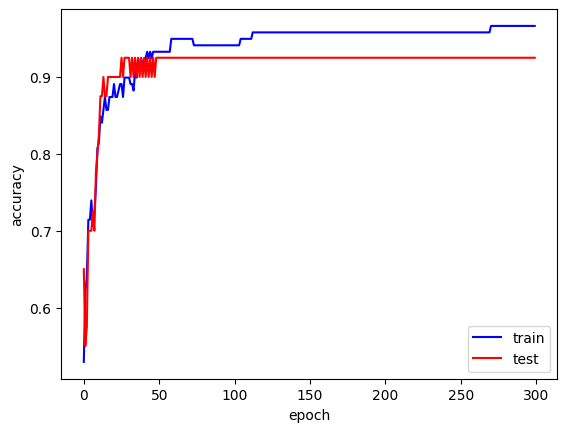

In [26]:
import matplotlib.pyplot as plt

plt.plot(train_score, c = 'blue')
plt.plot(test_score, c = 'red')
plt.legend(['train', 'test'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
# epoch 가 100일 때 가장 잘 훈련이 됨

In [29]:
sc = SGDClassifier(loss = 'log_loss', max_iter= 100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925
